<a href="https://colab.research.google.com/github/nemanovich/LLM-essentials/blob/main/Intro_to_LLM_APIs___LLM_Engineering_Essentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Engineering Essentials by Nebius Academy

# **Setting up the environment**

Let's install the `openai` library (the `-q` flag saves us from reading the outputs) and get the API keys.

In [3]:
!pip install -q openai

You'll need to upload the API keys to your current Jupyter directory. If you're running Jupyter on your own Linux machine, you can check which directory it is by running `!pwd`

In [6]:
import os
from google.colab import userdata

os.environ["NEBIUS_API_KEY"] = userdata.get('NEBIUS_API_KEY')
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# **Trying Nebius AI Studio and OpenAI**

## Nebius API

Nebius AI Studio serves several families of open source LLMs, including: Llama, Qwen, DeepSeek, Gemma, Mistral, Phi, and others.


### The client and the model

First of all, you need to define:

* **client**, which in case of Nebius AI Studio is

  ```
  client = OpenAI(
      base_url="https://api.studio.nebius.ai/v1/",
      api_key=os.environ.get("NEBIUS_API_KEY"),
  )
  ```

* **model**, that is the particular LLM we want to use. You can find more details about models, their pricing and other parameters [here](https://studio.nebius.ai/models).

  To get the right model name for the API call, press the small "copy" button at the top right corner of a model card:

  <center>
  <img src="https://drive.google.com/uc?export=view&id=1w9IkQ4hmwqFqYbLiXlu0iNIfm2l7Vrem" width=1000 />
  </center>

  For example, **Llama-3.3-70B** should be called using `model = "meta-llama/Llama-3.3-70B-Instruct"`.

### Prompt and completion

The text passed to an LLM is usually called a **prompt** and the LLM's output is known as **completion** (or response).

Let's make a simple API call to illustrate this:

In [5]:
from openai import OpenAI

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)
model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            # This is the prompt:
            "content": """The following Python implementation of the QuickSort algorithm contains a bug.
                          Find the bug and correct the code:
                          def quicksort(arr):
                              if len(arr) <= 1:
                                  return arr
                              pivot = arr[0]
                              left = [x for x in arr if x < pivot]
                              right = [x for x in arr if x >= pivot]
                              return quicksort(left) + [pivot] + quicksort(right)
                          """},
    ]
)

The `completion` variable contains much information; to extract only the completion. The answer itself is `completion.choices[0].message.content`:

In [6]:
print(completion.choices[0].message.content)

**Bug Identification and Correction**

The bug in the given implementation of the QuickSort algorithm is in the line where the `right` sublist is created. The condition `x >= pivot` causes the pivot element to be included in the `right` sublist, which leads to an infinite recursion when the pivot is the maximum element in the array.

**Corrected Code**

Here's the corrected implementation:

```python
def quicksort(arr):
    """
    Sorts an array using the QuickSort algorithm.

    :param arr: The input array to be sorted.
    :return: The sorted array.
    """
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x < pivot]  # Exclude the pivot element
    right = [x for x in arr[1:] if x >= pivot]  # Exclude the pivot element
    return quicksort(left) + [pivot] + quicksort(right)
```

**Explanation**

By changing the range in the list comprehensions to `arr[1:]`, we ensure that the pivot element is excluded from both the `left` and `right` sub

The `"usage"` dictionary stores token statistics that can be used to estimate the generation cost. You can check LLM pricing details in their model cards. As for February 18th, 2025, for the **Llama-3.1-8B** model you'd pay:

* \$0.13 / 1M (million) input (prompt) tokens,
* \$0.5 / 1M output (completion) tokens.

Let's calculate the price for our example:

In [8]:
(completion.usage.prompt_tokens * 0.13 + completion.usage.completion_tokens * 0.5) / (10**6)

0.00024713

Which is way less than 1 cent.

The prompt and completion length are indicated in **tokens**, which are usually word pieces. We'll discuss tokenization later this week.

### Dialog roles

The `messages` object you pass to the LLM API is a dictionary with fields `"content"` and `"role"`. Roles may be:

- `"user"`, that's you.
- `"assistant"`, a model's cue.
- `"system"` used to pass our wishes regarding the assistant's tone of voice, restrictions etc.

So, a dialog between a user and an LLM may look like:

```
messages=[
        {
            "role": "system",
            "content": <system prompt>
        },
        {
            "role": "user",
            "content": <user's first line>
        },
        {
            "role": "assistant"
            "content": <LLM's answer>
        },
        {
            "role": "user"
            "content": <user's second line>
        }
    ]
```

Let's look at an example:

In [7]:
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)
model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
            "role": "user",
            "content": """Who's a cooler fantasy writer: J. R. R. Tolkien or George R. R. Martin.?"""
        },
]

completion = client.chat.completions.create(
    model=model,
    messages=messages
)
completion.choices[0].message.content

'Both J.R.R. Tolkien and George R.R. Martin are incredibly talented and influential fantasy writers, but in different ways. The "cooler" one ultimately depends on personal taste. Here\'s a brief comparison:\n\n**Tolkien: The World-Building Maestro**\n\nTolkien is widely regarded as the father of modern fantasy literature. His Middle-earth stories, particularly "The Lord of the Rings," set the standard for epic fantasy world-building. He was a scholar of languages, mythology, and history, which he drew upon to create a richly detailed and immersive world. His writing style is often described as formal, lyrical, and atmospheric, with a focus on the struggles of good vs. evil.\n\n**George R.R. Martin: The Master of Grey Morality**\n\nGeorge R.R. Martin, on the other hand, is known for his gritty, complex, and often brutal depiction of fantasy worlds. His "A Song of Ice and Fire" series, adapted into the hit HBO show "Game of Thrones," is renowned for its moral ambiguity, political intrigu

We may continue dialog by appending the LLM's answer as an **assistant** message to the `messages` list and then adding the user's next question:

In [8]:
# We add the assistant's message
messages.append(
    {
        "role": "assistant",
        "content": completion.choices[0].message.content
    }
)

# Now, let's continue the dialog
messages.append(
    {
        "role": "user",
        "content": "But which one do you prefer? Choose only one of them!"
    }
)

completion = client.chat.completions.create(
    model=model,
    messages=messages
)
completion.choices[0].message.content

"A difficult choice! As a neutral AI assistant, I don't have personal preferences or opinions, but I can play along and make a hypothetical choice.\n\nIf I had to choose, I'd say... George R.R. Martin!\n\nI know, I know, Tolkien is a legend, and his works are foundational to the fantasy genre. However, I think Martin's ability to craft complex, nuanced characters and weave intricate plotlines is truly impressive. His willingness to subvert traditional fantasy tropes and conventions, combined with his masterful storytelling, has captivated audiences and inspired a new generation of fantasy writers.\n\nPlus, his world-building, particularly in Westeros, is meticulously detailed and richly atmospheric. Who wouldn't want to explore the Seven Kingdoms, visit the Wall, or attend a feast at Winterfell?\n\nOf course, this is just a hypothetical preference, and I can appreciate the beauty and significance of Tolkien's works as well. Both authors have contributed immensely to the fantasy genre, 

This way, you may keep quite long conversations in an LLM's "memory". But this memory isn't infinite; at some point you may hit the max context length.

**Note**. Structuring dialog as a list of messages is a good LLM engineering practice, but under the hood, all these messages are concatenated into something like this (the exact format depends on the LLM)

```
#SYSTEM
<system message>

#USER
<user's line 1>

#ASSISTANT
<assistant's line 1>

#USER
<user's line 2>
```

to be sent to the LLM as one structured prompt.

### Max context length

Each LLM has **max context length**, which is the maximal sum of lengths of all messages the LLM is going to process. For Llama-3.1 models it's 128k tokens. After you hit max context length, some of the starting messages will be ignored.

A short reference for you about the lengths of various data (with the tokenizer of Llama-3-8B; see details below; the numbers for other models' tokenizers would be close to that).

| Text  | n_tokens  |
|----------|----------|
| [Text2text\_generation.py from Transformers](https://github.com/huggingface/transformers/blob/main/src/transformers/pipelines/text2text_generation.py)   | 3.5k   |
| [xLSTM paper .tex file](https://arxiv.org/abs/2405.04517)    | 39k  |
| Harry Potter and the Philosopher's Stone | 109K |
| [UK Energy Act 2023](https://www.legislation.gov.uk/ukpga/2023/52/contents)   | 248k   |
| Lord of the Rings | 500K |
| Langchain github repo | 5.2M |
| Pytorch github repo | 28M |

And here are max context lengths of some of the popular LLMs:

| LLM  | max_tokens  |
|----------|----------|
| gpt-4o(-mini)   | 128k   |
| Claude 3.5 (Haiku & Sonnet)    | 200k  |
| Gemini 2.0 Flash | 1M |
| Llama 3.1   | 128k   |
| Qwen 2.5 | 128K |

These numbers are actually quite generous, and you'll be more than ok with them in most applications, but, as you see, some documents or document collections just can't be process by an LLM in one call.

## The max_tokens parameter

The API has many parameters which we'll be exploring in details in these notebooks. Let's start with `max_tokens`. It allows to control how many tokens will the **prompt + completion** have.

Let's look at an example:

In [9]:
from openai import OpenAI

# Nebius uses the same OpenAI() class, but with additional details
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

# Which LLM to use
# For more models, see https://studio.nebius.ai/models
model = "meta-llama/Meta-Llama-3.1-70B-Instruct"
completion = client.chat.completions.create(
    model=model,
    messages=[
    {
        "role": "system",
        "content": """You're a helpful assistant."""
    },
    {
        "role": "user",
        "content": """Explain in details the plot of Silmarillion."""
    },
    ],
    max_tokens=52
)

print(completion.to_json())

{
  "id": "chatcmpl-e6cb0a2466bb4f1fbdf4eb6154297dff",
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "A monumental task!\n\nThe Silmarillion is a book written by J.R.R. Tolkien, a renowned English author, philologist, and university professor best known for his fantasy stories, particularly The Hobbit and The Lord of the Rings. The Silmarillion",
        "refusal": null,
        "role": "assistant",
        "audio": null,
        "function_call": null,
        "tool_calls": [],
        "reasoning_content": null
      },
      "stop_reason": null
    }
  ],
  "created": 1752609231,
  "model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "object": "chat.completion",
  "service_tier": null,
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 52,
    "prompt_tokens": 32,
    "total_tokens": 84,
    "completion_tokens_details": null,
    "prompt_tokens_details": null
  },
  "prompt_logprob

Note that `"finishing_reason"` is now `"length"` (instead of `"stop"`, which would mean normal termination). This means that generation was stopped when it hit `max_tokens`.

Let's also extract the answer itself:

In [ ]:
print(completion.choices[0].message.content)

What a monumental task you've asked of me!

The Silmarillion is a book written by J.R.R. Tolkien, a high fantasy novel that forms the foundation of his legendarium, which also includes The Hobbit and The Lord of the Rings.


As you see, it's far from being a detailed description of the plot.

## OpenAI API

In this notebook we'll also try OpenAI API.

Its **client** is just `OpenAI()`. You can check the OpenAI's [model reference page](https://platform.openai.com/docs/models) to see what choice of the **models** they have. At the moment, we'd suggest choosing between:

* **gpt-4o-mini**, which is cheap, fast, and overall quite powerful,
* **gpt-4o**, which is larger, more capable, and more expensive, but not terribly so.

Let's make a simple API call:

In [18]:
from openai import OpenAI

client = OpenAI()
# Choosing which LLM to call
# More models here: https://platform.openai.com/docs/models
model = "gpt-4.1"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": """Who is the author of the Dune series?"""},
    ]
)
completion.choices[0].message.content

'The author of the original **Dune** series is **Frank Herbert**. He wrote the first six novels in the series, beginning with **"Dune"** published in 1965. After his death, his son **Brian Herbert** and co-author **Kevin J. Anderson** continued the series with additional novels.'

The API's interface is just the same.

# Multimodal input

Modern LLMs also increasingly incorporate other modalities, usually Images. LLMs that have such capabilities are called **VLM**s (Visual Language Models) or, more generally **MLLM**s (**Multimodal LLMs**).

Let's see how this works. For that, we'll load a synthetically generated map and ask **gpt-4o-mini** to find a route between two of its regions.

In [16]:
!gdown 1OW4MjT6A-5gUpyAi0_NyH94tCoNKGu8p

Downloading...
From: https://drive.google.com/uc?id=1OW4MjT6A-5gUpyAi0_NyH94tCoNKGu8p
To: /content/map000.png
100% 190k/190k [00:00<00:00, 105MB/s]


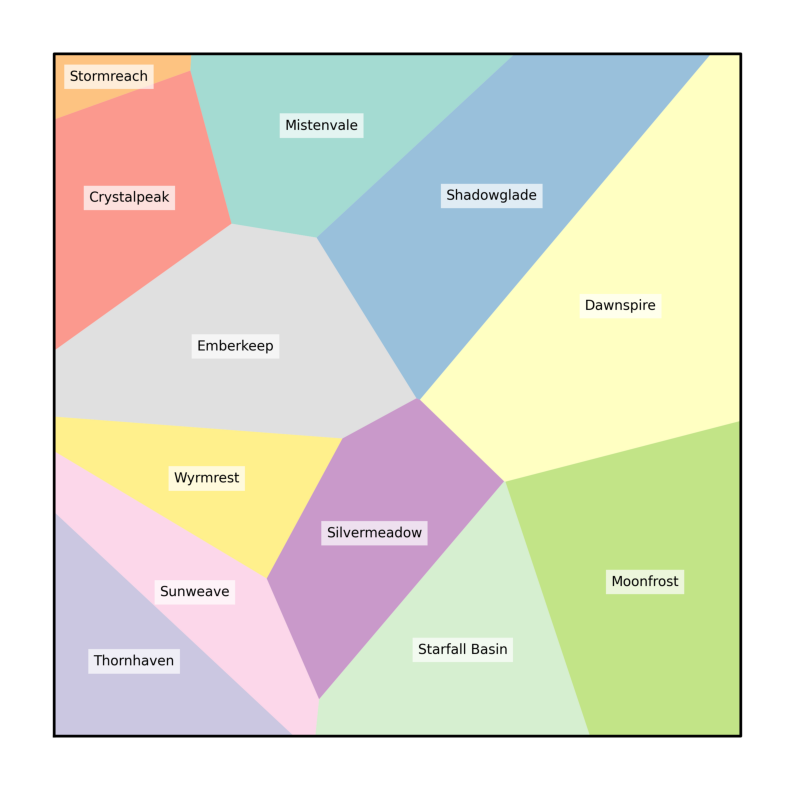

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('map000.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

OpenAI API requires to encode an image with `base64` before sending it to an LLM:

In [19]:
from openai import OpenAI
import base64

IMAGE_PATH = 'map000.png'
model = 'gpt-4o-mini'
client = OpenAI()

# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

journey_start = "Sunweave"
journey_end = "Shadowglade"

geography_prompt = f"""You are given a map of a fantasy realm.
It is divided into a number of regions with the name of the region indicated inside of it.
Your task is to describe potential journey from {journey_start} to {journey_end}.
Make sure that consecutive regions in the journey plan are really adjacent.
Only output a list of regions you'd pass on this journey as a list in exactly the following format:

JOURNEY:

{journey_start}
Region_1
...
Region_n
{journey_end}

YOUR RESPONSE:"""

completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are an expert pathfinder"},
        {"role": "user", "content": [
            {"type": "text", "text": geography_prompt},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
)

print(completion.choices[0].message.content)

JOURNEY:

Sunweave  
Silvermeadow  
Emberkeep  
Crystalpeak  
Shadowglade  


## Multimodality with Nebius API

Nebius AI Studio also serves a number of VLMs, which can be assessed [here](https://studio.nebius.com/?modality=image2text). As before, the interface stays the same; you just need to choose the right client and an appropriate model. We'll use **Qwen2-VL-72B**.

In [20]:
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "Qwen/Qwen2-VL-72B-Instruct"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are an expert pathfinder"},
        {"role": "user", "content": [
            {"type": "text", "text": geography_prompt},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
)

print(completion.choices[0].message.content)

JOURNEY:

Sunweave
Silvermeadow
Wyrmrest
Starfall Basin
Moonfrost
Dawnspire
Shadowglade


# Generating images with Nebius AI Studio

Nebius AI Studio also serves several text-to-image models such as **Flux** by **Black Forest Labs**. Let's try it:

In [7]:
import os
from openai import OpenAI

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY")
)


response = client.images.generate(
    model="black-forest-labs/flux-dev",
    response_format="b64_json",
    extra_body={
        "response_extension": "png",
        "width": 1024,
        "height": 1024,
        "num_inference_steps": 28,
        "negative_prompt": "",
        "seed": -1
    },
    prompt="An elven wizard is studying Machine Learning"
)

response_json = response.to_json()

Let's now plot the image:

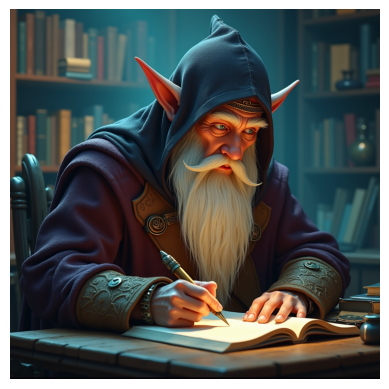

In [22]:
import matplotlib.pyplot as plt
import base64
import json
from PIL import Image
from io import BytesIO


response_data = json.loads(response_json)
b64_image = response_data['data'][0]['b64_json']
image_bytes = base64.b64decode(b64_image)
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)
plt.axis('off')  # Hide axes

plt.show()


# Practice: simple LLM applications

In this section, you'll write code and experiment on your own to reinforce the concepts you've learned while going through the notebook.

## Task 1. A (somewhat) safe LLM

When asking an LLM to edit a text you’ve written, have you ever changed company or people’s names to avoid exposing private data to the LLM provider? We do! Doing this manually is quite annoying, so we'll automate this!

In this task, you'll create a wrapper that replaces selected words with innocent alternatives before calling an LLM, then restores the original text afterward.

We've prepared a template for you. Please fill in the `#<YOUR CODE HERE>` parts. If you struggle, don't hesitate to ask an LLM ;) Just be sure to test the resulting code!

In [15]:
import re
from typing import Callable

class LLMPrivacyWrapper:
    def __init__(self, replacement_map: dict):
        """
        Initializes the wrapper with a mapping of words to their replacements.

        replacement_map: Dictionary where keys are sensitive words and values are their innocent replacements.
        """
        self.replacement_map = replacement_map
        self.reverse_map = {v: k for k, v in replacement_map.items()}  # Reverse for decoding

    @staticmethod
    def replace(text, replacement_map):
      pattern = re.compile("|".join(re.escape(key) for key in replacement_map.keys()))
      return pattern.sub(lambda match: replacement_map[match.group(0)], text)

    def encode(self, text: str) -> str:
        """
        Replaces sensitive words with innocent alternatives.

        text: Input text containing sensitive words.

        return: Encoded text with innocent replacements.
        """
        return LLMPrivacyWrapper.replace(text, self.replacement_map)

    def decode(self, text: str) -> str:
        """
        Restores original sensitive words in the text.

        :param text: Encoded text with innocent replacements.
        :return: Decoded text with original words restored.
        """
        return LLMPrivacyWrapper.replace(text, self.reverse_map)

    def answer_with_llm(self, text: str, client, model: str) -> str:
        """
        Encodes text, sends it to the LLM, and then decodes the response.

        :param text: The original input text.
        :param llm_call: A callable function simulating an LLM response.
        :return: The final processed text with original words restored.
        """
        response = client.chat.completions.create(
          model=model,
          messages=[
              {
                  "role": "user",
                  "content": self.encode(text)},
          ]
        )
        return self.decode(response.choices[0].message.content)

You can check your solution using the example below.

In [16]:
my_wrapper = LLMPrivacyWrapper(
    {"Hogwarts": "Hogsmith State Secondary School",
     "Albus Dumbledore": "Merlin",
     "Ministry of Magic": "London Bureau of Immigration and Statistics"}
)

prompt = """Edit the following announcement in a natural and supportive English.
Add some appropriate emoji to liven up the message. Explain your edits.

Human Resource Department

Important information for all employees

Dear workers of Hogwarts,

We must inform you of many issues which are now of importance. Hogwarts, as you all know, still under the leadership of Albus Dumbledore, even if sometimes it feels like rules do not apply here. However, as the Ministry of Magic keeps reminding us, we have responsibilities, and therefore you must pay attention.

First of all, Ministry of Magic people are coming. They will do inspection for checking on safety and teaching. This is requirement, do not argue. They will be in all classrooms and dungeons. If you are hiding things you should not have, better to do something about it now, before they see.

Second, regarding House-Elves. We see again that some staff are using them in magical experiments. This is not allowed! Stop doing this, or we will be forced to write reports. Albus Dumbledore says this is “highly inappropriate,” and honestly, so do we.

This is all. Try not to make more problems.

— Hogwarts HR Office
"""

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

result = my_wrapper.answer_with_llm(prompt,
                                           client=client, model=model)

print(result)

Here's the edited announcement:

**Important Update for All Staff** 📣

Dear Hogwarts Team,

We hope this message finds you well. We wanted to touch base regarding a few important matters that require your attention.

**Upcoming Inspection** 📝
Please be aware that representatives from the Ministry of Magic will be visiting our school for a routine inspection. They will be reviewing our safety protocols and teaching practices to ensure we meet the necessary standards. This is a mandatory check, and we appreciate your cooperation.

To prepare, please ensure your classrooms and workspaces are tidy and organized. If you have any items that are not permitted, please remove them before the inspection.

**House-Elf Welfare** 🐰
We've been made aware that some staff members have been using House-Elves in magical experiments. We must remind you that this is strictly forbidden. Not only does it put the well-being of the House-Elves at risk, but it also goes against school policies. Albus Dumbledor

In [17]:
encoded_prompt = my_wrapper.encode(prompt)

print(encoded_prompt)

decoded_prompt = my_wrapper.decode(encoded_prompt)

assert decoded_prompt == prompt

Edit the following announcement in a natural and supportive English.
Add some appropriate emoji to liven up the message. Explain your edits.

Human Resource Department

Important information for all employees

Dear workers of Hogsmith State Secondary School,

We must inform you of many issues which are now of importance. Hogsmith State Secondary School, as you all know, still under the leadership of Merlin, even if sometimes it feels like rules do not apply here. However, as the London Bureau of Immigration and Statistics keeps reminding us, we have responsibilities, and therefore you must pay attention.

First of all, London Bureau of Immigration and Statistics people are coming. They will do inspection for checking on safety and teaching. This is requirement, do not argue. They will be in all classrooms and dungeons. If you are hiding things you should not have, better to do something about it now, before they see.

Second, regarding House-Elves. We see again that some staff are usin

## Task 2. "Broken telephone"

In this task, we suggest you to implement the game of "Broken telephone" with a text-to-image model and a multimodal LLM. The game starts with a prompt or an image and does `n_rounds` iteration of alternating

* Creating an image from a text prompt.
* Creating a textual description of an image with a multimodal LLM.

Run several iterations and observe how far (or not) the process will go from the original media!


=== Round #0 ===
Prompt: The Princess and the Pea - a princess fishing in a palace swimpool, sitting on a tall stack of mattresses


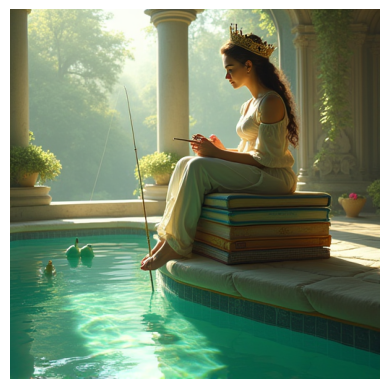


=== Round #1 ===
Prompt: The image depicts a serene scene where a person is sitting cross-legged on a stack of books by the edge of a pool. The individual is holding a fishing rod and appears to be fishing. The setting includes columns and ornate architectural elements, suggesting a palace-like environment. The water in the pool is clear, and there are ducks swimming nearby. The atmosphere is peaceful and calm, with natural light illuminating the scene.


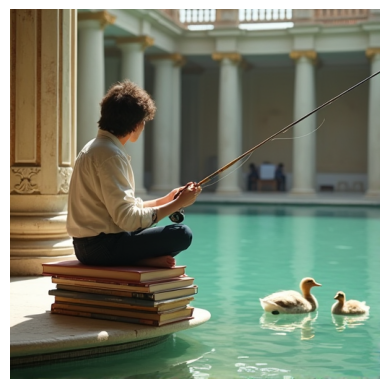


=== Round #2 ===
Prompt: The image depicts a person sitting on a stack of books by the edge of a swimming pool. The individual is holding a fishing rod, with a couple of ducklings swimming nearby in the pool. The setting appears to be an ornate, possibly historical or luxurious swimming area with elegant architecture in the background.


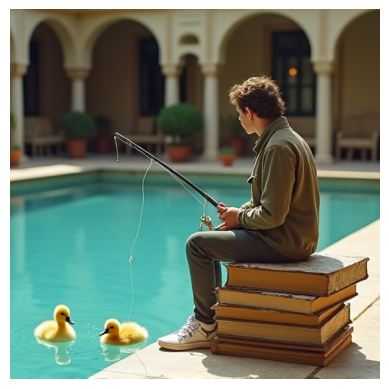


=== Round #3 ===
Prompt: In the image, a person is sitting on a stack of large books by the edge of a pool. The person is holding a fishing rod and appears to be fishing in the pool. There are two small yellow ducklings swimming in the pool near the person. The setting seems to be an outdoor area with architectural features in the background.


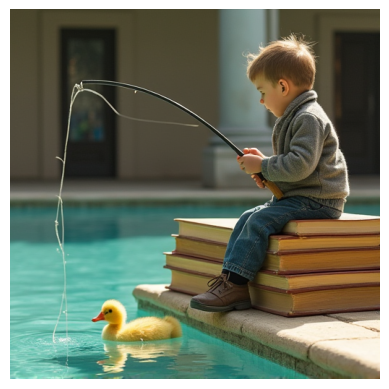

In [34]:
import os
import requests
import matplotlib.pyplot as plt
from openai import OpenAI
from PIL import Image
from io import BytesIO
from IPython.display import display, Image as IPImage
from datetime import datetime
import json
import base64

class BrokenTelephoneGame:
    def __init__(self, multimodal_llm):
        self.llm = multimodal_llm


    def show_image(self, encoded_image):
      image_bytes = base64.b64decode(encoded_image)
      image = Image.open(BytesIO(image_bytes))
      plt.imshow(image)
      plt.axis('off')
      plt.show()


    def play_round(self, text_prompt):
        b64_image = self.llm.generate_image(text_prompt)
        self.show_image(b64_image)
        return self.llm.describe_image(b64_image)


    def play_game(self, initial_prompt, n_rounds=3):
        current_input = initial_prompt
        for round_num in range(n_rounds):
            print(f"\n=== Round #{round_num} ===")
            print(f"Prompt: {current_input}")
            current_input = self.play_round(current_input)

class MultimodalLLM:
    def __init__(self):
        self.client = OpenAI(
          base_url="https://api.studio.nebius.ai/v1/",
          api_key=os.environ.get("NEBIUS_API_KEY"),
        )


    def describe_image(self, image_base64):
        completion = client.chat.completions.create(
          model="Qwen/Qwen2-VL-72B-Instruct",
          messages=[
              {"role": "user", "content": [
                  {"type": "text", "text": "Briefly describe a given image"},
                  {"type": "image_url", "image_url": {
                      "url": f"data:image/png;base64,{image_base64}"}
                  }
              ]}
          ]
        )
        return completion.choices[0].message.content


    def generate_image(self, prompt):
        response = client.images.generate(
            model="black-forest-labs/flux-dev",
            response_format="b64_json",
            extra_body={
                "response_extension": "png",
                "width": 512,
                "height": 512,
                "num_inference_steps": 28,
                "negative_prompt": "",
                "seed": -1
            },
            prompt=prompt
        )
        return response.data[0].b64_json


game = BrokenTelephoneGame(MultimodalLLM())

initial_prompt = "The Princess and the Pea - a princess fishing in a palace swimpool, sitting on a tall stack of mattresses"
game.play_game(initial_prompt, n_rounds=4)


**Hints**

1. What you actually need is to take the above examples of multimodal LLM usage and image generating and combine them into one cycle with some fancy visualization.
2. But if you want to enjoy the result without so much coding, there's a shortcut! You can try sending the task formulation and the above examples to an LLM and asking it to create code for you! There's even no need to use API; you can just go to the playground and

  ```
  Here's the task I'm creating:

  ## Task 2. "Broken telephone"
  In this task, we suggest you to implement the game of "Broken telephone" with a text-to-image model and a multimodal LLM. The game starts with a prompt or an image and does n_rounds iteration of alternating
  * Creating an image from a text prompt.
  * Creating a textual description of an image with a multimodal LLM.
  Run several iterations and observe how far (or not) the process will go from the original media!

  And I need a reference solution for that.

  ## That's how I generate an image:
  <EXAMPLE HERE>

  ## That's an example of how I work with a multimodal LLM:
  <EXAMPLE HERE>

  ## Your task
  Please provide the reference solution
  ```
  
  The author of this notebook prefers [Anthropic Claude 3.5 Sonnet](https://claude.ai/chat/). To date, it's one of the top LLMs for coding. You don't need an API for that; it's much easier to work with their playground for this task. However, Claude will want money, and if that's an issue, ChatGPT should also work.